In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
def dist(x1, y1, x2, y2): 
    return np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

In [3]:
n = 100
eps, minPts = 14, 3

In [4]:
x = [np.random.randint(1, 100) for i in range(n)]
y = [np.random.randint(1, 100) for i in range(n)]

In [5]:
def draw_flags(flags):
    for i in range(0,n):    
        plt.scatter(x[i],y[i], color=flags[i])
    plt.show()

In [6]:
def draw_clusters(clusters):
    df = pd.DataFrame(columns={'x', 'y', 'clusters'})
    df['x'] = [x[i] for i in range(n) if clusters[i] != 0]
    df['y'] = [y[i] for i in range(n) if clusters[i] != 0]
    df['clusters'] = [clusters[i] for i in range(n) if clusters[i] != 0]
    x_r = [x[i] for i in range(n) if clusters[i] == 0]
    y_r = [y[i] for i in range(n) if clusters[i] == 0]
    facet = sns.lmplot(data=df, x='x', y='y', hue='clusters', 
                       fit_reg=False, legend=True, legend_out=True)
    plt.scatter(x_r, y_r, c='r')

In [11]:
def DBModel(x, y, n, eps, minPts):
    flags = [] 
    for i in range(0, n):
        # количество соседей, -1 потому что считает себя
        neighb = -1
        for j in range(0, n):
            if dist(x[i], y[i], x[j], y[j]) < eps:
                neighb += 1
        if neighb >= minPts:
            flags.append('g')
        else:
            flags.append('b')

    draw_flags(flags)
            
    for i in range(n): 
        if flags[i] == 'b': 
            for j in range(n): 
                if flags[j] == 'g' and dist(x[i],y[i],x[j],y[j]) < eps: 
                    flags[i] = 'y' 
                    break 
        if flags[i] == 'b': 
            flags[i] = 'r' 
    
    draw_flags(flags)
    
    clusters = np.zeros(n) 
    cl = 1 

    for i in range(n):                    
        if flags[i] == 'g': 
            if clusters[i] == 0: 
                clusters[i] = cl 
                cl += 1 
            for j in range(n): 
                d = dist(x[i], y[i], x[j], y[j])
                if flags[j] == 'g':
                    if d < eps:
                        clusters[j] = clusters[i] 
                if flags[j] == 'y':
                    if d < eps and d == min(dist(x[j], y[j], x[k], y[k]) for k in range(n) if flags[k] == 'y'):
                        clusters[j] = clusters[i] 
    
    return clusters

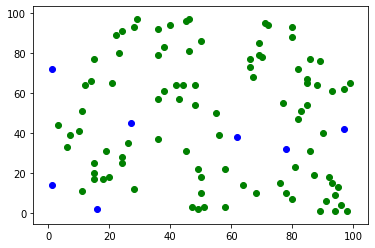

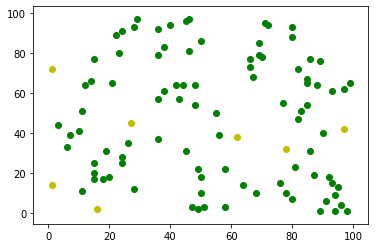

In [12]:
clusters = DBModel(x, y, n, eps, minPts)

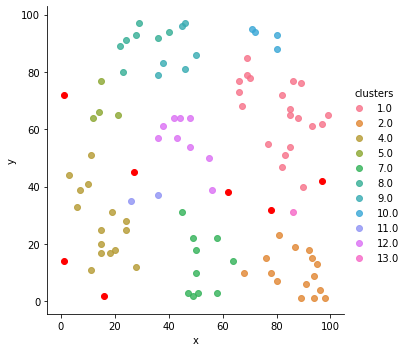

In [13]:
draw_clusters(clusters)